In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import nnqs
import sampler
import hamiltonian
import optimizer

2025-07-10 22:24:26.847281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752179066.883095   85417 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752179066.894026   85417 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752179066.919247   85417 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752179066.919273   85417 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752179066.919277   85417 computation_placer.cc:177] computation placer alr

In [2]:
n_spins = 16
density = 16
n_hidden_spins = int(n_spins * density)

In [3]:
wave = nnqs.RBM(n_visible=n_spins, n_hidden=n_hidden_spins)

print("a:", wave.a.numpy())
print("b:", wave.b.numpy())
print("W:", wave.W.numpy())

tfih = hamiltonian.TFIH(L=n_spins, J=-1.0, h=0.0, pbc=True)

m_sampler = sampler.GibbsSampler(n_visible=n_spins, n_hidden=n_hidden_spins, k=5, batch_size=500)
#print("Initial state:", m_sampler.current_state)
opt = optimizer.VMC(
    wave_function=wave,
    hamiltonian=tfih,
    sampler=m_sampler,
    learning_rate=0.01
)
wave_1 = nnqs.RBM(n_visible=n_spins, n_hidden=n_hidden_spins)
wave_1.W.assign(wave.W)
wave_1.a.assign(wave.a)
wave_1.b.assign(wave.b)

m_sampler_1 = sampler.GibbsSampler(n_visible=n_spins, n_hidden=n_hidden_spins, k=5, batch_size=500)
#print("Initial state:", m_sampler.current_state)
opt_1 = optimizer.StochasticReconfiguration(
    wave_function=wave_1,
    hamiltonian=tfih,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.0001,
)

a: [ 0.01936504  0.0256415  -0.0753993  -0.05563305 -0.10810997  0.01813943
  0.07937224 -0.09972568  0.05024339  0.05320566  0.01111981  0.07062577
 -0.14260758 -0.19593039  0.05435758 -0.06399107]
b: [ 1.18516661e-01 -1.14329122e-01  9.67591852e-02 -2.47433260e-01
 -6.66595697e-02 -1.22832648e-01 -1.12582505e-01  2.20326502e-02
  4.93016420e-03 -1.06818199e-01 -1.43768638e-01 -5.21478355e-02
 -1.09738685e-01 -1.24792211e-01 -1.45915180e-01  4.32573557e-02
  4.60683890e-02  4.84523624e-02  2.22157482e-02  1.83841571e-01
  1.81408674e-01  1.20994568e-01  8.59229714e-02  3.51503938e-02
 -5.07550053e-02  1.04195409e-01  4.23185974e-02 -2.28510294e-02
  1.36134535e-01 -6.67270049e-02 -5.71170263e-03  1.56705260e-01
 -4.67487536e-02  1.23905605e-02 -2.49443769e-01  5.16558588e-02
  4.73125689e-02  6.96365833e-02 -7.20707327e-02 -7.87380189e-02
 -1.59822866e-01 -9.82865170e-02  1.39260605e-01  1.62946790e-01
  4.33251681e-03  2.51981139e-01  5.01558296e-02  2.75602080e-02
 -5.65268360e-02 -

I0000 00:00:1752179070.972578   85417 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 762 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [4]:
results_vmc = opt.train(n_iterations=500)

Iteration 0: Energy = 0.800000, Variance = 17.088001
Iteration 1: Energy = -1.256000, Variance = 18.166462
Iteration 2: Energy = -3.608000, Variance = 16.710337
Iteration 3: Energy = -7.872000, Variance = 12.143618
Iteration 4: Energy = -9.904000, Variance = 7.830784
Iteration 5: Energy = -11.040000, Variance = 3.622400
Iteration 6: Energy = -11.120000, Variance = 3.065600
Iteration 7: Energy = -11.408000, Variance = 2.209536
Iteration 8: Energy = -11.408000, Variance = 2.273536
Iteration 9: Energy = -11.616000, Variance = 1.388544
Iteration 10: Energy = -11.568000, Variance = 1.669376
Iteration 11: Energy = -11.592000, Variance = 1.721536
Iteration 12: Energy = -11.616000, Variance = 1.708544
Iteration 13: Energy = -11.624000, Variance = 1.426624
Iteration 14: Energy = -11.728000, Variance = 1.014016
Iteration 15: Energy = -11.800000, Variance = 0.824000
Iteration 16: Energy = -11.848000, Variance = 0.584896
Iteration 17: Energy = -11.784000, Variance = 0.881344
Iteration 18: Energy =

In [7]:
results_sr = opt_1.train(n_iterations=500)

I0000 00:00:1752179245.538912   85417 cuda_solvers.cc:175] Creating GpuSolver handles for stream 0x556012467f40


Iteration 0: Energy = 0.584000, Variance = 16.394945
Iteration 1: Energy = 0.888000, Variance = 15.115455
Iteration 2: Energy = 0.760000, Variance = 14.686399
Iteration 3: Energy = 0.824000, Variance = 17.081024
Iteration 4: Energy = 0.680000, Variance = 14.353601
Iteration 5: Energy = 0.736000, Variance = 16.546303
Iteration 6: Energy = 0.632000, Variance = 16.656576
Iteration 7: Energy = 0.384000, Variance = 14.892545
Iteration 8: Energy = 0.712000, Variance = 16.549057
Iteration 9: Energy = 0.408000, Variance = 15.417537
Iteration 10: Energy = 0.376000, Variance = 16.594625
Iteration 11: Energy = 0.024000, Variance = 16.415426
Iteration 12: Energy = 0.456000, Variance = 15.376064
Iteration 13: Energy = 0.192000, Variance = 14.491136
Iteration 14: Energy = -0.240000, Variance = 16.262400
Iteration 15: Energy = -0.112000, Variance = 15.411456
Iteration 16: Energy = -0.560000, Variance = 14.726400
Iteration 17: Energy = 0.000000, Variance = 15.040000
Iteration 18: Energy = -0.200000, V

In [8]:
# plot the results
import matplotlib.pyplot as plt

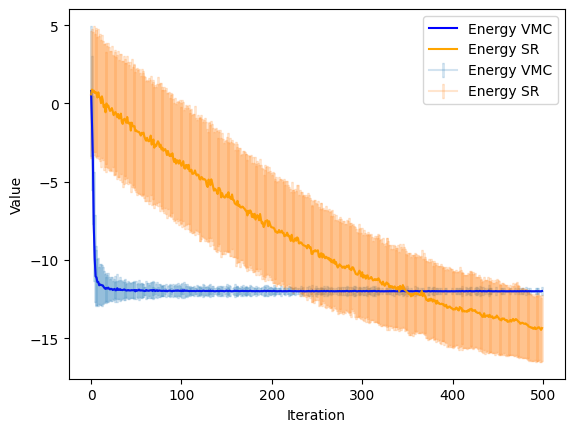

In [9]:
plt.errorbar(
    np.arange(len(results_vmc['energies'])),
    results_vmc['energies'],
    yerr=np.sqrt(results_vmc['variances']),
    label='Energy VMC',
    ecolor='tab:blue',
    elinewidth=2,
    alpha=0.2,
    capsize=1
)
plt.errorbar(
    np.arange(len(results_sr['energies'])),
    results_sr['energies'],
    yerr=np.sqrt(results_sr['variances']),
    label='Energy SR',
    ecolor='tab:orange',
    elinewidth=2,
    alpha=0.2,
    capsize=1
)
plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.plot(results_sr['energies'], label='Energy SR', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [10]:
print(m_sampler.sample(wave)[0])
#print(m_sampler_1.sample(wave_1)[0])
print(m_sampler_1.sample(wave_1)[0])

tf.Tensor([1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.], shape=(16,), dtype=float32)
tf.Tensor([0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.], shape=(16,), dtype=float32)
